<a href="https://colab.research.google.com/github/raghav720/Sentiment_Analysis_from_Social_Media_Dataset/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1 : Data Processing

## Dataset

Dataset: [Fake news](https://www.kaggle.com/competitions/fake-news/data)

train.csv : id, title, author, text, label(0,1)

test.csv : id, title, author, text

submit.csv : id, label

Google Drive Path: /content/drive/MyDrive/Research/train.csv



## Import necessary libraries

In [ ]:
from google.colab import drive
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import os

## Mount Google Drive & Load the dataset

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the training dataset
df_train = pd.read_csv('/content/drive/MyDrive/Research/dataset/train.csv', encoding='utf-8')

In [ ]:
# Load the test dataset
df_test = pd.read_csv('/content/drive/MyDrive/Research/dataset/test.csv', encoding='utf-8')

In [ ]:
df_train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


## Text Preprocessing

In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
# Function to clean text (remove special characters, numbers, convert to lowercase, and remove extra spaces)
def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Remove extra whitespaces
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ''  # Return an empty string for non-string values

In [ ]:
# Function to preprocess text (clean, tokenize, remove stopwords, and lemmatize)
def preprocess_text(text):
    # Clean the text
    text = clean_text(text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

In [ ]:
# Combine 'title' and 'text' columns
df_train['combined'] = df_train['title'] + ' ' + df_train['text']
df_test['combined'] = df_test['title'] + ' ' + df_test['text']

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Apply the preprocessing function to the combined text in both train and test datasets
df_train['cleaned_combined'] = df_train['combined'].apply(preprocess_text)
# df_test['cleaned_combined'] = df_test['combined'].apply(preprocess_text)

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=1f34e09d834a39f5abaa3aa1e3257c7e33f0df6ac5d07bf74a0bcb05e69b7ca1
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

# Set seed for reproducibility in language detection
DetectorFactory.seed = 0

# Function to check if text is in English
def is_english(text):
    # Handle non-string values by returning False
    if not isinstance(text, str):
        return False
    try:
        return detect(text) == 'en'
    except LangDetectException:
        return False

# Drop rows where 'combined' column is empty or contains only whitespace
df_train = df_train[df_train['combined'].str.strip().astype(bool)]

# Drop rows where 'label' column is empty, NaN, or contains values other than 0 or 1
df_train = df_train[df_train['label'].isin([0, 1])]

# Drop rows where 'combined' text is not in English
df_train = df_train[df_train['combined'].apply(is_english)]

# Reset index after dropping rows (optional, for clean indexing)
df_train.reset_index(drop=True, inplace=True)

# Print the shape of the updated DataFrame to confirm changes
print(f"Updated df_train shape: {df_train.shape}")

Updated df_train shape: (19731, 7)


In [ ]:
df_train[['cleaned_combined', 'label']].head()

,cleaned_combined,label
0,house dem aide didnt even see comeys letter ja...,1
1,flynn hillary clinton big woman campus breitba...,0
2,truth might get fired truth might get fired oc...,1
3,civilian killed single u airstrike identified ...,1
4,iranian woman jailed fictional unpublished sto...,1


In [ ]:
df_test[['cleaned_combined']].head()

,cleaned_combined
0,specter trump loosens tongue purse string sili...
1,russian warship ready strike terrorist near al...
2,nodapl native american leader vow stay winter ...
3,tim tebow attempt another comeback time baseba...
4,keiser report meme war e min ago view comment ...


## Save the processed DataFrames

In [ ]:
# Path to the folder where you want to save the files
drive_path = '/content/drive/My Drive/Research/processed/'

# Create the directory if it doesn't exist
os.makedirs(drive_path, exist_ok=True)

In [ ]:
# Save the processed datasets to Google Drive as CSV files
df_train.to_csv(os.path.join(drive_path, 'processed_train_new.csv'), index=False)
df_test.to_csv(os.path.join(drive_path, 'processed_test_new.csv'), index=False)

print("Datasets saved to Google Drive in folder:", drive_path)

Datasets saved to Google Drive in folder: /content/drive/My Drive/Research/processed/


# Stage 2 : Training & Testing

## Import necessary libraries

In [ ]:
!pip install numpy scipy scikit-learn pandas joblib pytorch
!pip install tpot

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pytorch)
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.4 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=9c8354e595de3f4ead3d3b2a41627b3ae0413df115ad9ed0f2f73aa0b599b119
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import os
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from tpot import TPOTClassifier
import pickle
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models, preprocessing
from sklearn.model_selection import GridSearchCV

## Mount Google Drive & Load the processed dataset

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the training dataset
df_train = pd.read_csv('/content/drive/MyDrive/Research/processed/processed_train_new.csv', encoding='utf-8')

## Text Vectorization

### TF-IDF

In [ ]:
# Replace NaN values with empty strings in 'cleaned_combined' column
df_train['cleaned_combined'] = df_train['cleaned_combined'].fillna('')

In [ ]:
# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the train data
X_train_tfidf = tfidf_vectorizer.fit_transform(df_train['cleaned_combined'])

In [ ]:
# Extract labels
y = df_train['label']

In [ ]:
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.2, random_state=42)

## Logistic Regression (LR)

### Training

In [ ]:
# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### Save the Model and Vectorizer

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the model and vectorizer
joblib.dump(logreg, os.path.join(model_path, 'logreg_model_new.pkl'))
joblib.dump(tfidf_vectorizer, os.path.join(model_path, 'tfidf_vectorizer.pkl'))

print("Model and vectorizer saved to Google Drive in folder:", model_path)

Model and vectorizer saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


### Testing

In [ ]:
# Predict on the test set
y_pred = logreg.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9432
Precision: 0.9346
Recall: 0.9457
F1 Score: 0.9401


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

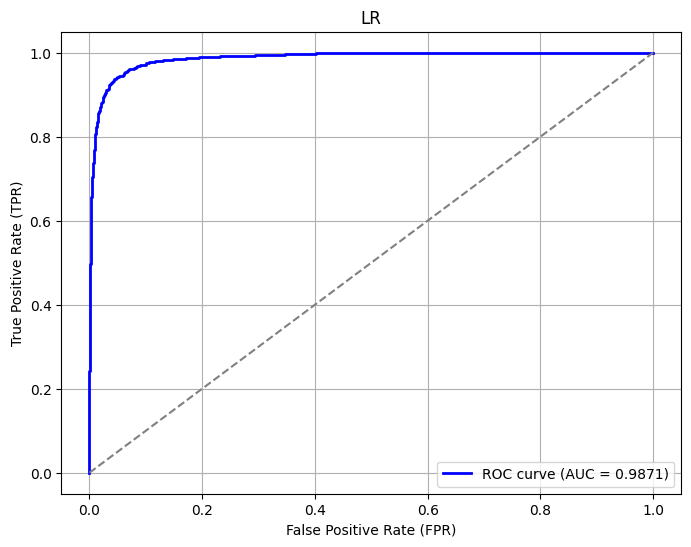

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('LR')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9871


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)
print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0654


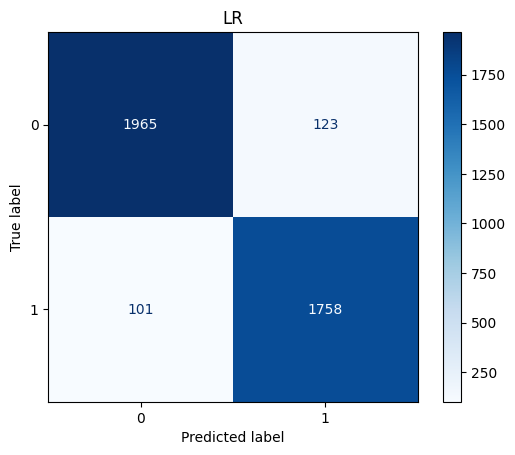

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("LR")
plt.show()

### Prediction

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

NameError: name 'drive' is not defined

In [ ]:
# Import necessary libraries
import joblib
import os

In [ ]:
# Define the path where the model and vectorizer are stored
model_path = '/content/drive/My Drive/Research/saved/'

In [ ]:
# Load the Logistic Regression model
logreg_model = joblib.load(os.path.join(model_path, 'logreg_model.pkl'))

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load(os.path.join(model_path, 'tfidf_vectorizer.pkl'))

print("Model and vectorizer loaded successfully.")

Model and vectorizer loaded successfully.


In [ ]:
# New data (title + text)
new_data = ["Breaking news: The government announces new policies to reduce inflation."]

# Combine the title and text into one column (if not combined)
new_data_combined = new_data

# Preprocess and vectorize using the loaded TF-IDF vectorizer
X_new_tfidf = tfidf_vectorizer.transform(new_data_combined)

# Predict the label using the loaded Logistic Regression model
predictions = logreg_model.predict(X_new_tfidf)

print(f"Predicted labels: {predictions}")

Predicted labels: [1]


## Support Vector Machines (SVM)

### Training

In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

### Save the Model

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the SVM model
joblib.dump(svm_model, os.path.join(model_path, 'svm_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


In [ ]:
svm_model = joblib.load(os.path.join(model_path, 'svm_model.pkl'))

tfidf_vectorizer = joblib.load(os.path.join(model_path, 'tfidf_vectorizer.pkl'))

print("Model and vectorizer loaded successfully.")

Model and vectorizer loaded successfully.


### Testing

In [ ]:
# Predict labels for df_test
y_pred = svm_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9539
Precision: 0.9467
Recall: 0.9559
F1 Score: 0.9513


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

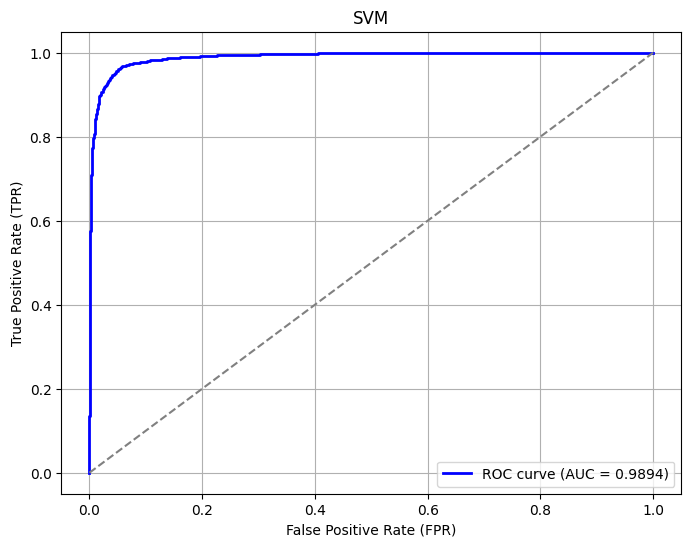

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9894


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0533


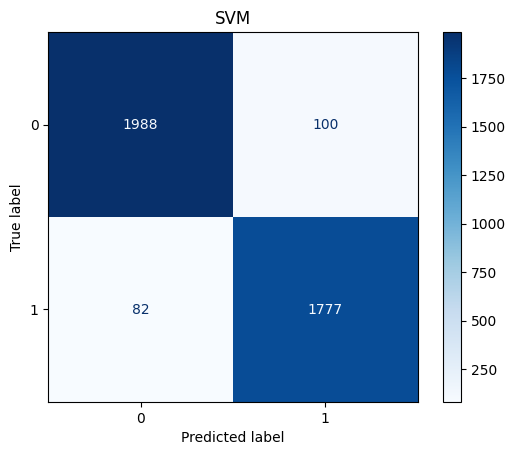

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVM")
plt.show()

## Naive Bayes (NB)

### Training

In [ ]:
# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

### Save the Model

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the NB model
joblib.dump(nb_model, os.path.join(model_path, 'nb_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


In [ ]:
nb_model = joblib.load(os.path.join(model_path, 'nb_model.pkl'))

tfidf_vectorizer = joblib.load(os.path.join(model_path, 'tfidf_vectorizer.pkl'))

print("Model and vectorizer loaded successfully.")

Model and vectorizer loaded successfully.


### Testing

In [ ]:
# Predict labels for df_test
y_pred = nb_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8860
Precision: 0.9033
Recall: 0.8488
F1 Score: 0.8752


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

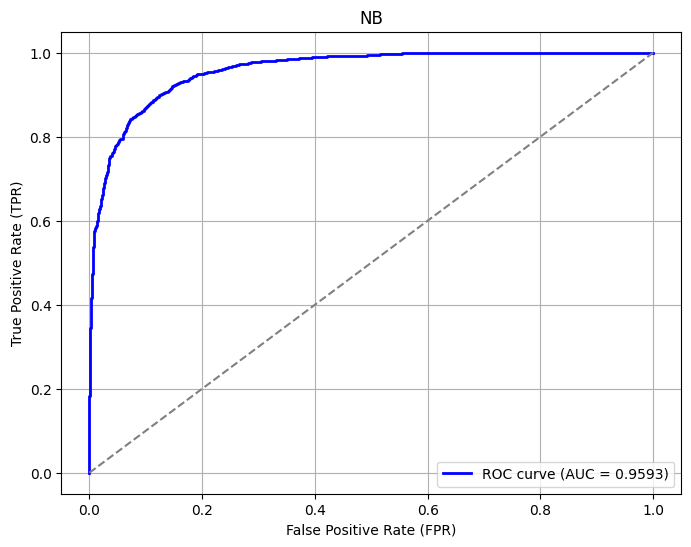

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('NB')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9593


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0967


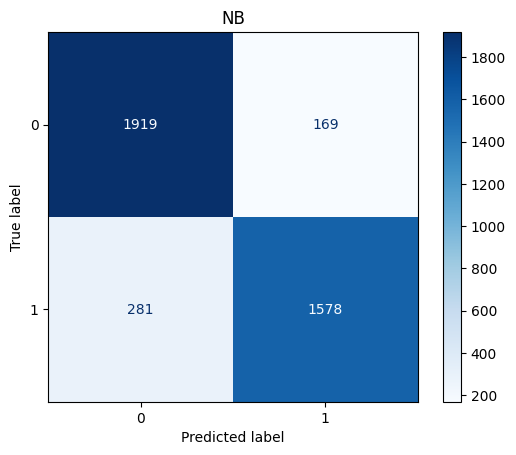

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("NB")
plt.show()

## Random Forest (RF)

### Training

In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Save the Model

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the RF model
joblib.dump(rf_model, os.path.join(model_path, 'rf_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


### Testing

In [ ]:
# Predict labels for df_test
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9633
Precision: 0.9673
Recall: 0.9543
F1 Score: 0.9607


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

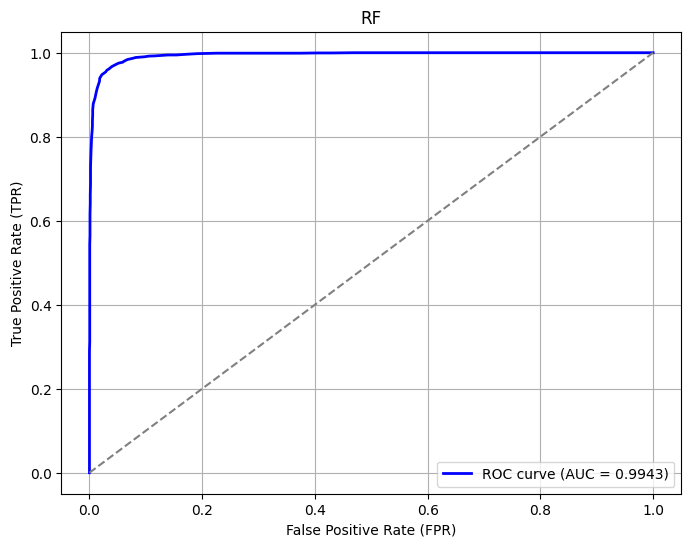

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('RF')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9943


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0327


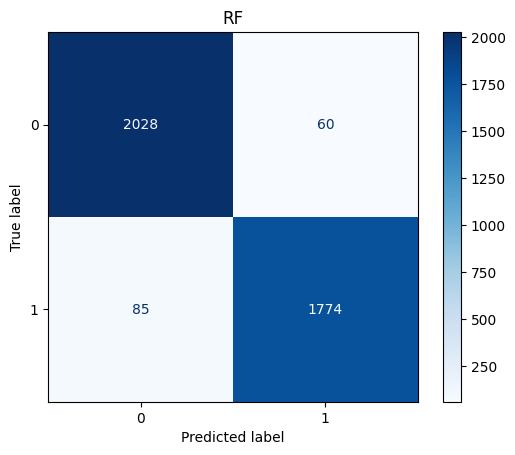

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("RF")
plt.show()

## Decision Tree (DT)

### Training

In [ ]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Save the Model

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the DT model
joblib.dump(dt_model, os.path.join(model_path, 'dt_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


### Testing

In [ ]:
# Predict labels for df_test
y_pred = dt_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9250
Precision: 0.9204
Recall: 0.9204
F1 Score: 0.9204


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

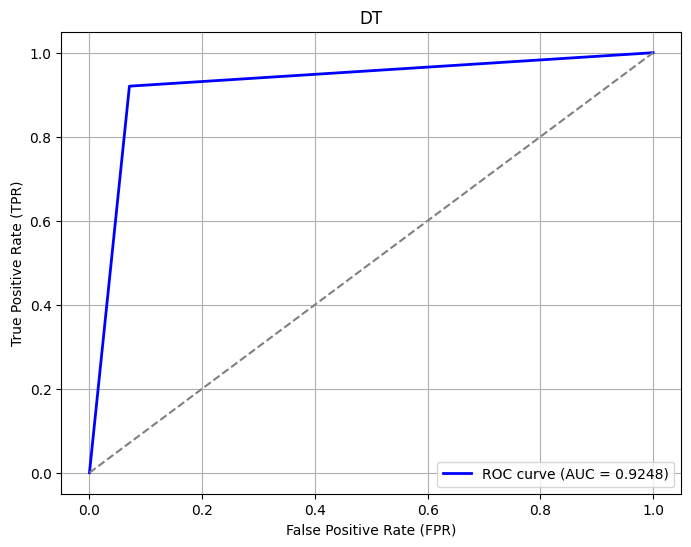

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('DT')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9248


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0796


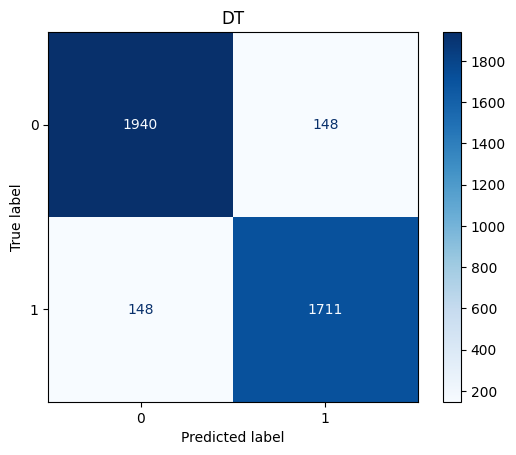

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("DT")
plt.show()

## K-Nearest Neighbors (KNN)

### Training

In [ ]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=11, n_jobs=-1)  # Adjust n_neighbors as needed
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=11)

### Optimization

In [ ]:
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best k: {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best k: 1
Best cross-validated accuracy: 0.69
Test set accuracy: 0.71


### Save the Model

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the KNN model
joblib.dump(knn_model, os.path.join(model_path, 'knn_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


### Testing

In [ ]:
# Predict labels for df_test
y_pred = knn_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8576
Precision: 0.8511
Recall: 0.8456
F1 Score: 0.8484


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = knn_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

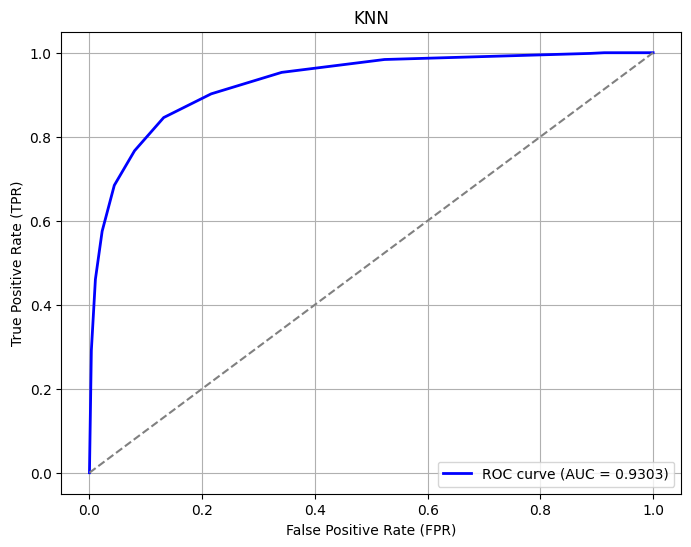

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9303


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.1489


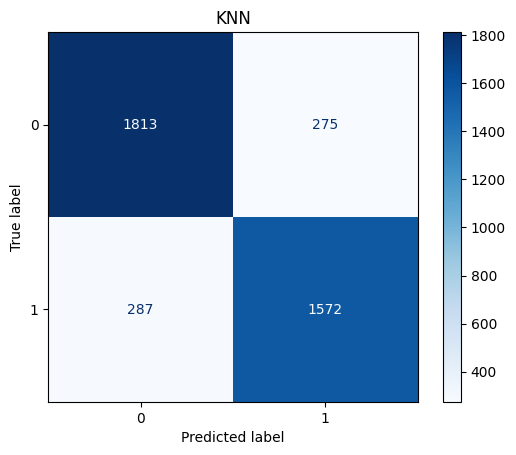

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("KNN")
plt.show()

## AutoML (TPOT)

### Training

In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [ ]:
# Train TPOT using parallel processing
tpot = TPOTClassifier(
    verbosity=2,
    generations=5,
    population_size=20,
    random_state=42,
    config_dict='TPOT sparse',
    n_jobs=-1
)
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.955889423076923

Generation 2 - Current best internal CV score: 0.955889423076923

Generation 3 - Current best internal CV score: 0.9591947115384615

Generation 4 - Current best internal CV score: 0.9591947115384615

Generation 5 - Current best internal CV score: 0.9624399038461539

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.5, max_depth=3, min_child_weight=18, n_estimators=100, n_jobs=1, subsample=0.7000000000000001, verbosity=0)


TPOTClassifier(config_dict='TPOT sparse', generations=5, n_jobs=2,
               population_size=20, random_state=42, verbosity=2)

### Save the Model

In [ ]:
# Export the best pipeline
tpot.export('/content/drive/MyDrive/Research/saved/tpot_pipeline.py')

print("Pipeline saved to Google Drive")

Pipeline saved to Google Drive


### Testing

In [ ]:
# Predict labels for df_test
y_pred = tpot.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = tpot.score(X_test, y_test)
print(f"TPOT Accuracy: {accuracy:.4f}")

TPOT Accuracy: 0.9661


In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9661
Precision: 0.9650
Recall: 0.9655
F1 Score: 0.9652


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = tpot.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

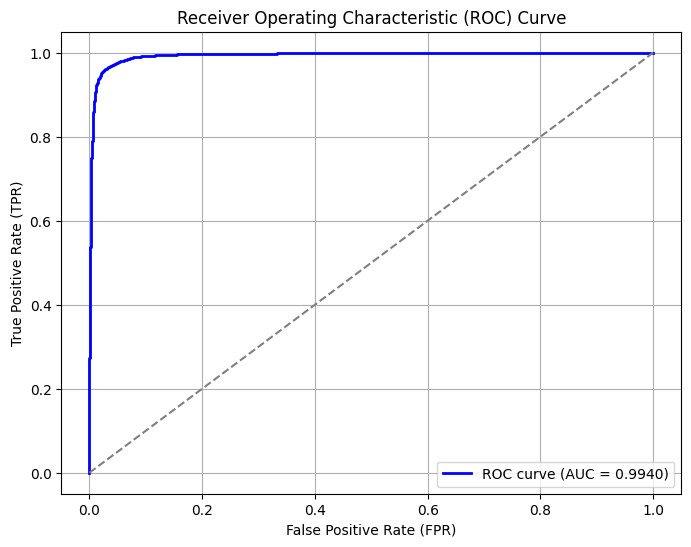

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9940


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0350


## XGBoost

### Training

In [ ]:
# Train an XGBoost model
xgb_model = XGBClassifier(
    learning_rate=0.5,
    max_depth=5,
    min_child_weight=10,
    n_estimators=100,
    subsample=0.95,
    n_jobs=-1,
    verbosity=0,
    random_state=42
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

### Save the model

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the XGBoost model
joblib.dump(xgb_model, os.path.join(model_path, 'xgb_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


### Testing

In [ ]:
# Predict labels for df_test
y_pred = xgb_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9683
Precision: 0.9646
Recall: 0.9683
F1 Score: 0.9664


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

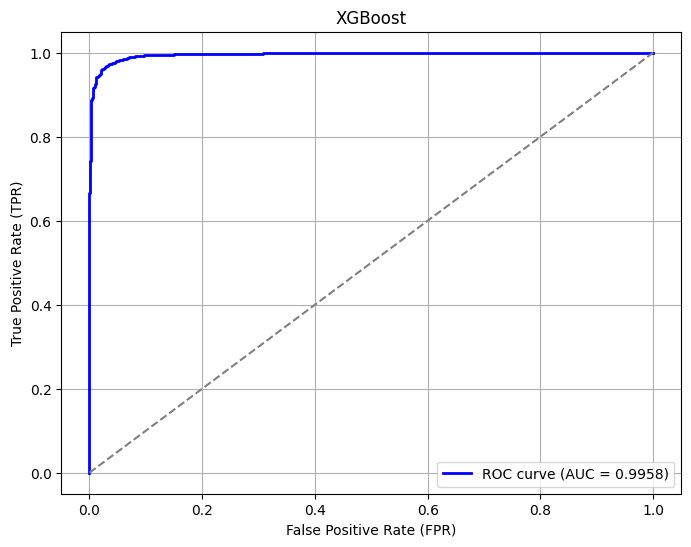

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('XGBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9958


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0354


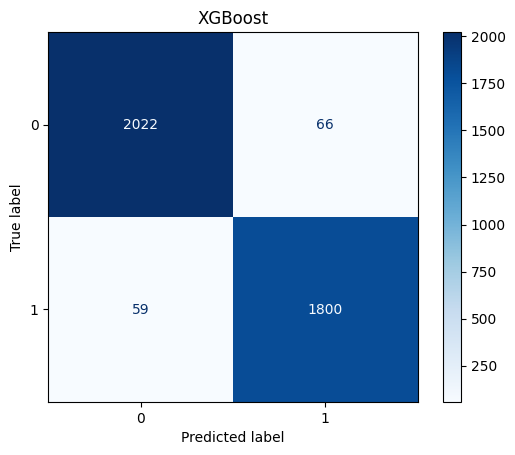

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("XGBoost")
plt.show()

## GBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a GBM model
gbm_model = GradientBoostingClassifier(
    learning_rate=0.5,
    max_depth=5,
    min_samples_split=10,
    n_estimators=100,
    subsample=0.95,
    random_state=42
)

gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, min_samples_split=10,
                           random_state=42, subsample=0.95)

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the XGBoost model
joblib.dump(gbm_model, os.path.join(model_path, 'gbm_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


In [ ]:
# Predict labels for df_test
y_pred = gbm_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9602
Precision: 0.9536
Recall: 0.9623
F1 Score: 0.9580


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = gbm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

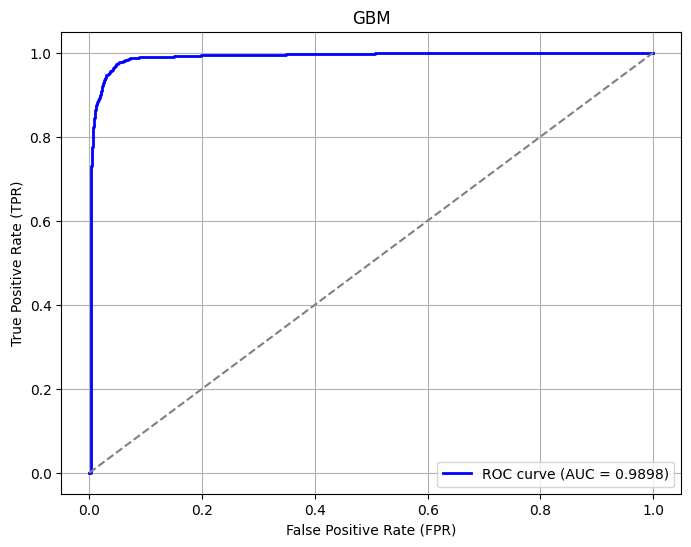

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('GBM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9898


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0464


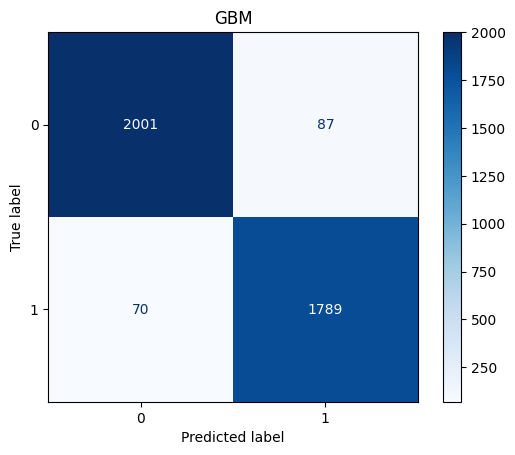

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("GBM")
plt.show()

## LightGBM

In [ ]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.2 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMClassifier

# Train a LightGBM model
lgbm_model = LGBMClassifier(
    learning_rate=0.5,
    max_depth=5,
    min_child_weight=10,
    n_estimators=100,
    subsample=0.95,
    n_jobs=-1,
    random_state=42
)

lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 7486, number of negative: 8298
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.046072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678911
[LightGBM] [Info] Number of data points in the train set: 15784, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474278 -> initscore=-0.102980
[LightGBM] [Info] Start training from score -0.102980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

LGBMClassifier(learning_rate=0.5, max_depth=5, min_child_weight=10, n_jobs=-1,
               random_state=42, subsample=0.95)

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the XGBoost model
joblib.dump(lgbm_model, os.path.join(model_path, 'lgbm_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


In [ ]:
# Predict labels for df_test
y_pred = lgbm_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9711
Precision: 0.9653
Recall: 0.9736
F1 Score: 0.9695


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = lgbm_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

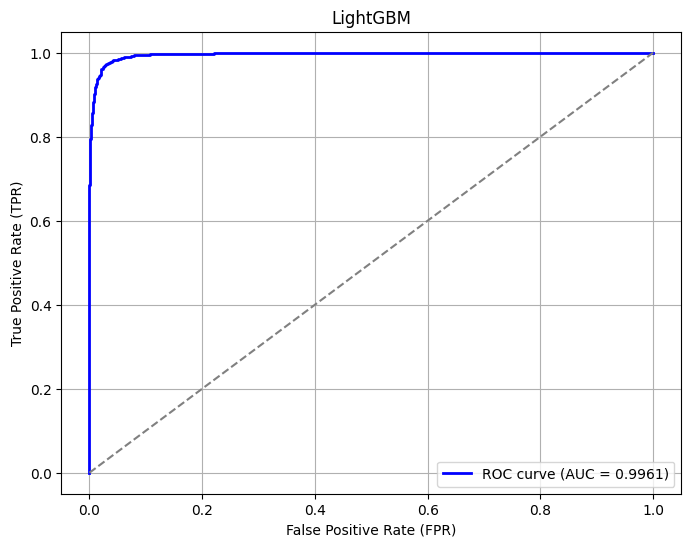

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('LightGBM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9961


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0347


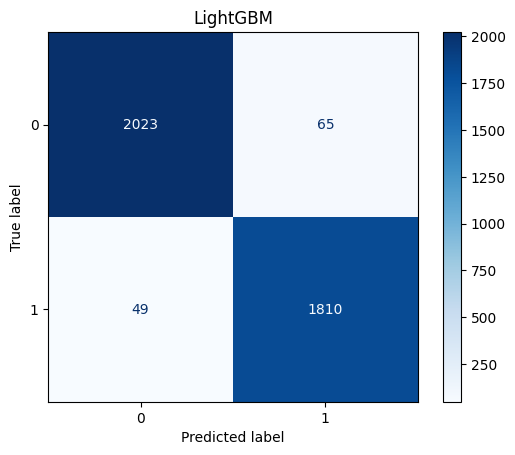

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgbm_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("LightGBM")
plt.show()

## CatBoost

In [ ]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

# Train a CatBoost model
catboost_model = CatBoostClassifier(
    learning_rate=0.5,
    depth=5,
    iterations=100,
    subsample=0.95,
    random_seed=42,
    verbose=1
)

catboost_model.fit(X_train, y_train)


0:	learn: 0.3556979	total: 1.57s	remaining: 2m 35s
1:	learn: 0.2529903	total: 2.45s	remaining: 1m 59s
2:	learn: 0.2164438	total: 3.27s	remaining: 1m 45s
3:	learn: 0.1929803	total: 4.1s	remaining: 1m 38s
4:	learn: 0.1797209	total: 4.89s	remaining: 1m 32s
5:	learn: 0.1648641	total: 5.7s	remaining: 1m 29s
6:	learn: 0.1578868	total: 6.51s	remaining: 1m 26s
7:	learn: 0.1500548	total: 7.36s	remaining: 1m 24s
8:	learn: 0.1440380	total: 8.45s	remaining: 1m 25s
9:	learn: 0.1386163	total: 9.75s	remaining: 1m 27s
10:	learn: 0.1349763	total: 11.2s	remaining: 1m 30s
11:	learn: 0.1314503	total: 12.7s	remaining: 1m 33s
12:	learn: 0.1266856	total: 14s	remaining: 1m 33s
13:	learn: 0.1233129	total: 14.8s	remaining: 1m 31s
14:	learn: 0.1204236	total: 15.6s	remaining: 1m 28s
15:	learn: 0.1177723	total: 16.4s	remaining: 1m 26s
16:	learn: 0.1159434	total: 17.2s	remaining: 1m 24s
17:	learn: 0.1131974	total: 18s	remaining: 1m 22s
18:	learn: 0.1104670	total: 18.8s	remaining: 1m 20s
19:	learn: 0.1078791	total: 

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the XGBoost model
joblib.dump(catboost_model, os.path.join(model_path, 'catboost_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

In [ ]:
# Predict labels for df_test
y_pred = catboost_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9671
Precision: 0.9591
Recall: 0.9715
F1 Score: 0.9653


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

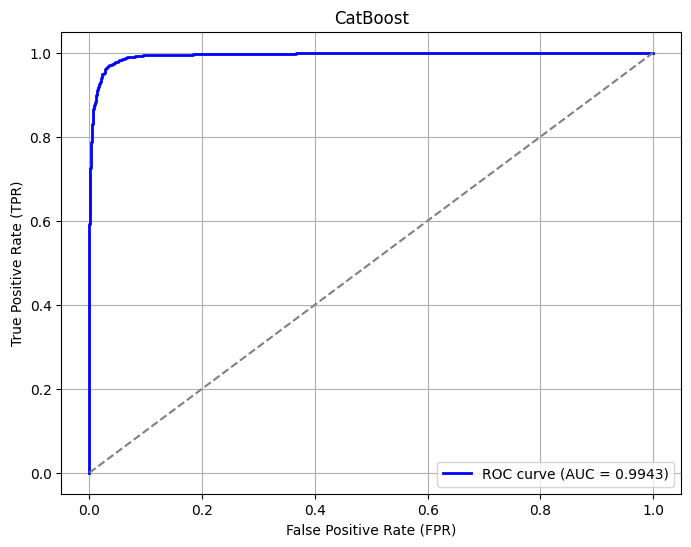

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('CatBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9943


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0409


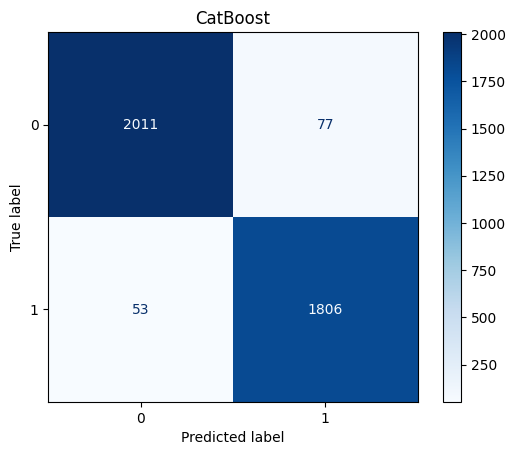

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("CatBoost")
plt.show()

## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Base learner for AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=5)

# Train an AdaBoost model
adaboost_model = AdaBoostClassifier(
    estimator=base_estimator,
    learning_rate=0.5,
    n_estimators=100,
    random_state=42
)

adaboost_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=100, random_state=42)

In [ ]:
# Define model save path
model_path = '/content/drive/My Drive/Research/saved/'
os.makedirs(model_path, exist_ok=True)

In [ ]:
# Save the XGBoost model
joblib.dump(adaboost_model, os.path.join(model_path, 'adaboost_model_new.pkl'))

print("Model saved to Google Drive in folder:", model_path)

Model saved to Google Drive in folder: /content/drive/My Drive/Research/saved/


In [ ]:
# Predict labels for df_test
y_pred = adaboost_model.predict(X_test)

In [ ]:
# Calculate basic metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9534
Precision: 0.9525
Recall: 0.9484
F1 Score: 0.9504


In [ ]:
# Compute ROC Curve and AUC
y_pred_prob = adaboost_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

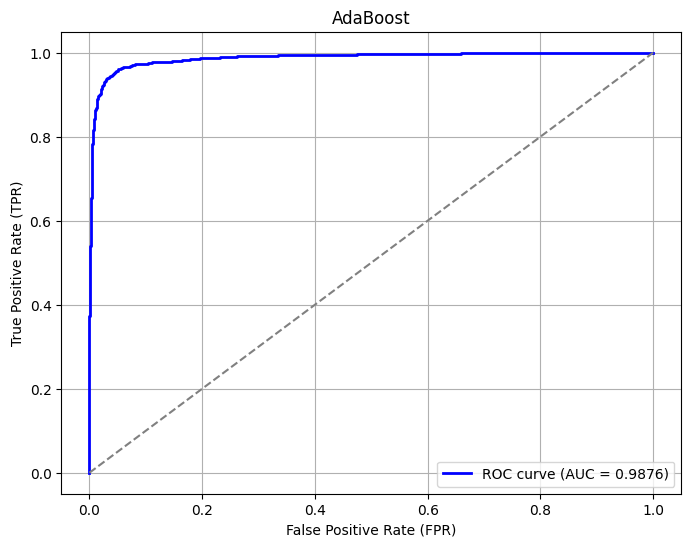

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('AdaBoost')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# AUC
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9876


In [ ]:
# Confusion Matrix to calculate FPR
cm = confusion_matrix(y_test, y_pred)

# False Positive Rate (FPR)
FP = cm[0, 1]
TN = cm[1, 1]
FPR = FP / (FP + TN)

print(f"False Positive Rate (FPR): {FPR:.4f}")

False Positive Rate (FPR): 0.0475


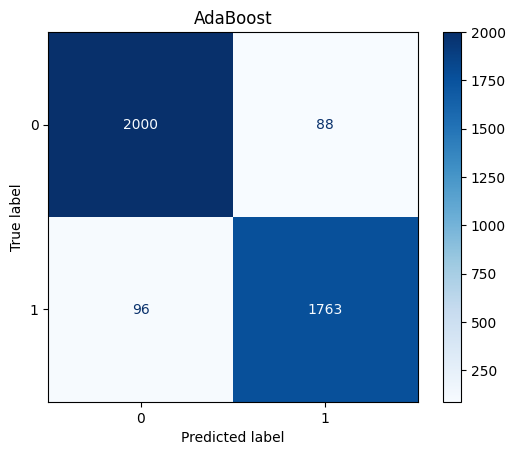

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=adaboost_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("AdaBoost")
plt.show()

# Charts

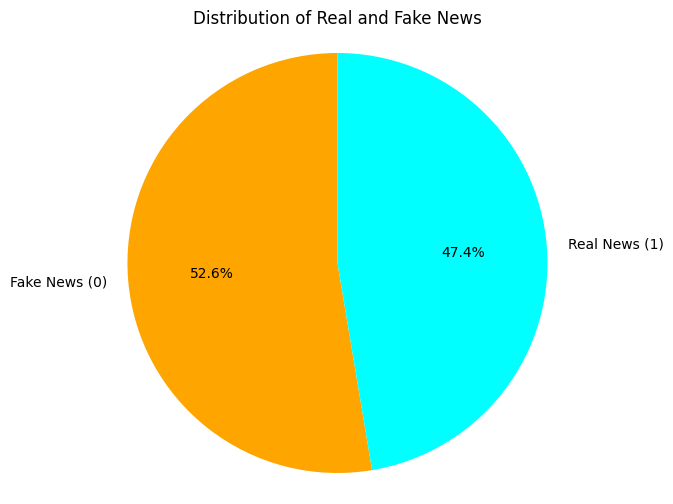

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv('train.csv')

# Count the occurrences of each label (0: Fake, 1: Real)
label_counts = df_train['label'].value_counts()

# Prepare labels and sizes for the pie chart
labels = ['Fake News (0)', 'Real News (1)']
sizes = [label_counts.get(0, 0), label_counts.get(1, 0)]  # Handle cases where labels might be missing

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'aqua'])
plt.title('Distribution of Real and Fake News')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
